In [2]:
import pandas as pd


In [37]:

df = pd.read_csv("MBTA_2022_System-Wide_Passenger_Survey_Data.csv")
# Display the first few rows of the DataFrame
print(df.head(10))



  aggregation_level service_mode reporting_group               measure_group  \
0   Reporting Group          Bus             104  Trip Purpose and Frequency   
1   Reporting Group          Bus             104  Trip Purpose and Frequency   
2   Reporting Group          Bus             104  Trip Purpose and Frequency   
3   Reporting Group          Bus             104  Trip Purpose and Frequency   
4   Reporting Group          Bus             104  Trip Purpose and Frequency   
5   Reporting Group          Bus             104  Trip Purpose and Frequency   
6   Reporting Group          Bus             104  Trip Purpose and Frequency   
7   Reporting Group          Bus             104  Trip Purpose and Frequency   
8   Reporting Group          Bus             104                    Vehicles   
9   Reporting Group          Bus             104                    Vehicles   

           measure                    category  weighted_percent  ObjectId  
0        Frequency        1 to 2 days per 

In [38]:
bus_data = df[df['service_mode'] == 'Bus']
mask = ~((bus_data['reporting_group'] == 'Somerville/Medford/Charlestown - East') & (bus_data['service_mode'] == 'All Bus'))
bus_data=bus_data[mask]
bus_race = bus_data[bus_data['measure']=='Race']
grouped_data = bus_race.groupby('category')['weighted_percent'].mean().reset_index()
print("bus: race percentage")
print(grouped_data)


bus: race percentage
                                    category  weighted_percent
0           American Indian or Alaska Native          0.020043
1                                      Asian          0.122152
2                  Black or African American          0.366046
3            Middle Eastern or North African          0.027222
4  Native Hawaiian or other Pacific Islander          0.003702
5                                      Other          0.034942
6                          Prefer not to say          0.062044
7                                      White          0.404292


      category  weighted_percent
0     18 to 25          0.265697
1     26 to 34          0.288967
2     35 to 44          0.175699
3     45 to 64          0.153972
4  65 or older          0.037414
5     Under 18          0.079162


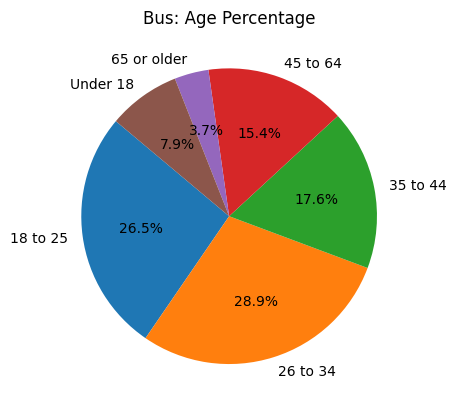

In [53]:
bus_age = bus_data[bus_data["measure"]=="Age"]
grouped_age_data = bus_age.groupby('category')['weighted_percent'].mean().reset_index()
print(grouped_age_data)
plt.pie(grouped_age_data['weighted_percent'], labels=grouped_age_data['category'], autopct='%1.1f%%', startangle=140)
plt.title('Bus: Age Percentage')

# Show the plot
plt.show()

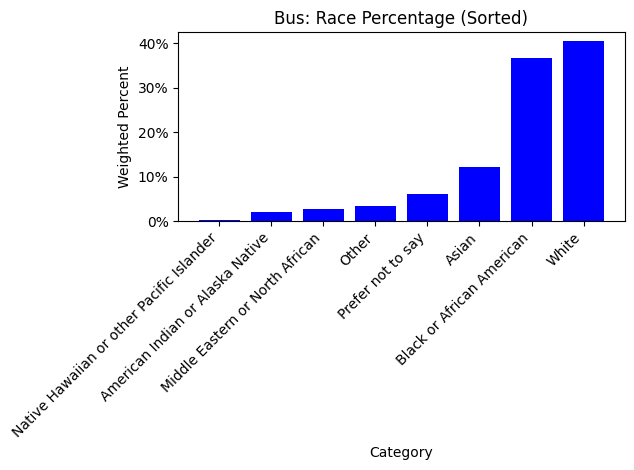

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming your grouped data is named grouped_data
grouped_data = [
    {"category": "American Indian or Alaska Native", "weighted_percent": 0.020043},
    {"category": "Asian", "weighted_percent": 0.122152},
    {"category": "Black or African American", "weighted_percent": 0.366046},
    {"category": "Middle Eastern or North African", "weighted_percent": 0.027222},
    {"category": "Native Hawaiian or other Pacific Islander", "weighted_percent": 0.003702},
    {"category": "Other", "weighted_percent": 0.034942},
    {"category": "Prefer not to say", "weighted_percent": 0.062044},
    {"category": "White", "weighted_percent": 0.404292},
]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(grouped_data)

# Sort the DataFrame by 'weighted_percent' in ascending order
df_sorted = df.sort_values(by='weighted_percent')

# Create a bar chart
plt.bar(df_sorted['category'], df_sorted['weighted_percent'], color='blue')
plt.xlabel('Category')
plt.ylabel('Weighted Percent')
plt.title('Bus: Race Percentage (Sorted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()

# Show the plot
plt.show()


In [50]:
bus_household_income = bus_data[bus_data['measure']=='Household Income']
bus_low_income = bus_data[bus_data['measure']=='Title VI Low-Income']
grouped_data1 = bus_low_income.groupby('category')['weighted_percent'].mean().reset_index()
grouped_data2 = bus_household_income.groupby('category')['weighted_percent'].mean().reset_index()
print("Whether belongs to low-income group?")
print(grouped_data1)
print("household_income")
print(grouped_data2)

Whether belongs to low-income group?
  category  weighted_percent
0       No          0.441732
1      Yes          0.558268
household_income
               category  weighted_percent
0  $131,000 to $186,999          0.024115
1      $187,000 or more          0.018648
2    $28,000 to $55,999          0.325284
3    $56,000 to $74,999          0.230657
4    $75,000 to $92,999          0.095839
5   $93,000 to $130,999          0.038367
6     Less than $28,000          0.172566
7     Prefer not to say          0.108138


In [72]:
bus_line_minority = bus_data[bus_data["measure"] == 'Title VI Minority']
bus_line_minority_t = bus_line_minority[bus_line_minority['category']=='Yes']


In [86]:
# Assuming bus_line_minority_t is your DataFrame
# Replace the following line with the actual path or URL to your CSV file if you're reading from a file
# bus_line_minority_t = pd.read_csv("your_file.csv")

# List of reporting groups to include
reporting_groups_to_include = ['104', '15', '1', '111', '114, 116, & 117', '22', '23', '21', '16', '43 & SL5',
                                '28 & 29', '34 & 34E', '39', '32', '57', '61 & 70', '67 & 77', '66', '47', '86']

# Filter rows based on reporting_group
filtered_bus_line_minority_t = bus_line_minority_t[bus_line_minority_t['reporting_group'].isin(reporting_groups_to_include)]
filtered_bus_age = bus_age[bus_age['reporting_group'].isin(reporting_groups_to_include)]
filtered_bus_age = filtered_bus_age[filtered_bus_age["category"]=="Under 18"]

In [74]:

# Find the top 10 reporting groups based on 'weighted_percent'
top_10_reporting_groups = filtered_bus_line_minority_t.nlargest(10, 'weighted_percent')

# Display the result
print("Top 10 Bus Routes (Reporting Groups) by Weighted Percent:")
print(top_10_reporting_groups[['reporting_group', 'weighted_percent']])

Top 10 Bus Routes (Reporting Groups) by Weighted Percent:
      reporting_group  weighted_percent
909           28 & 29          0.921064
445                22          0.918808
527                23          0.898041
147                15          0.890736
1191               32          0.871447
95                104          0.865625
549                21          0.854404
615                16          0.799342
845          43 & SL5          0.774261
363   114, 116, & 117          0.729611


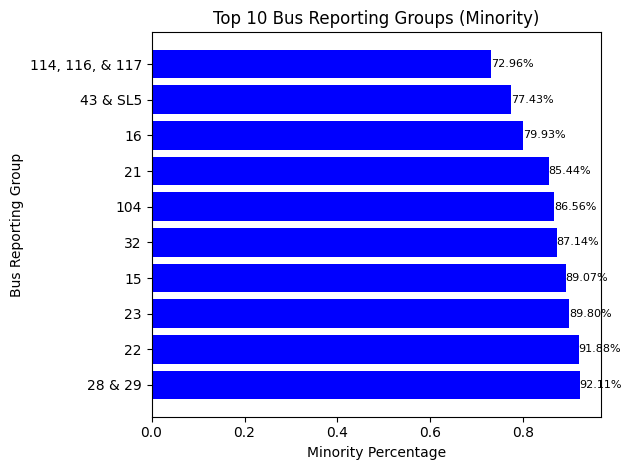

In [75]:
plt.barh(top_10_reporting_groups['reporting_group'], top_10_reporting_groups['weighted_percent'], color='blue')
plt.xlabel('Minority Percentage')
plt.ylabel('Bus Reporting Group')
plt.title('Top 10 Bus Reporting Groups (Minority)')

for index, value in enumerate(top_10_reporting_groups['weighted_percent']):
    plt.text(value, index, f'{value:.2%}', ha='left', va='center', fontsize=8)

plt.tight_layout()
# Show the plot
plt.show()

In [87]:
top_5_age_line = filtered_bus_age.nlargest(5, 'weighted_percent')

# Display the result
print("Top 5 Bus Routes (Age under 18)")
print(top_5_age_line[['reporting_group', 'weighted_percent']])

Top 5 Bus Routes (Age under 18)
     reporting_group  weighted_percent
791               21          0.253589
1172              32          0.237768
427               22          0.198440
506               23          0.143963
736          28 & 29          0.135228


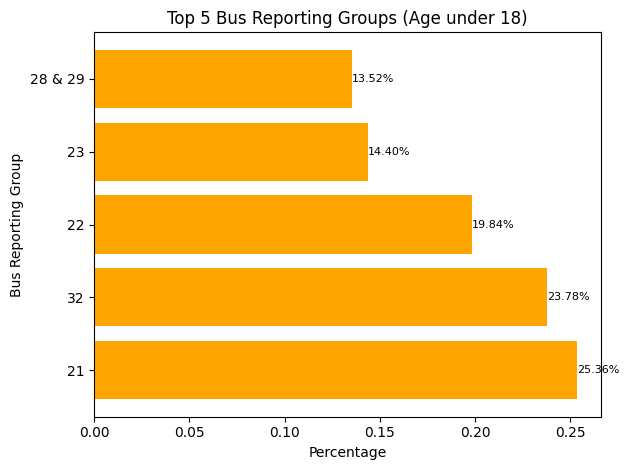

In [89]:
plt.barh(top_5_age_line['reporting_group'], top_5_age_line['weighted_percent'], color='orange')
plt.xlabel('Percentage')
plt.ylabel('Bus Reporting Group')
plt.title('Top 5 Bus Reporting Groups (Age under 18)')

for index, value in enumerate(top_5_age_line['weighted_percent']):
    plt.text(value, index, f'{value:.2%}', ha='left', va='center', fontsize=8)

plt.tight_layout()
# Show the plot
plt.show()